C:\Users\Pearl\AppData\Local\Temp\4d3f05b6-b24f-44fd-a57d-bba6dd835494_bank.zip.494\bank.csv

C:\Users\Pearl\AppData\Local\Temp\d690afc9-1645-45d6-ad99-3b084f3d313b_bank.zip.13b\bank-full.csv

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
import graphviz

In [51]:
data = pd.read_csv(r"C:\Users\Pearl\AppData\Local\Temp\4d3f05b6-b24f-44fd-a57d-bba6dd835494_bank.zip.494\bank.csv",sep=';')

In [52]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [53]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [55]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [56]:
data.shape

(4521, 17)

In [57]:
data.size

76857

In [58]:
data.index

RangeIndex(start=0, stop=4521, step=1)

In [59]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [60]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Define the feature columns and target column

In [62]:
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
target = 'y'

In [63]:
data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)

In [64]:
# Split the data into training and testing sets
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
4153,42,440,3,13,5,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2085,33,-77,28,151,3,-1,0,True,False,False,...,True,False,False,False,False,False,False,False,False,True
1891,32,656,20,148,2,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3611,28,389,11,15,7,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4015,36,5902,23,219,4,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,41,1536,4,54,2,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
466,34,-370,21,748,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3092,46,523,6,105,4,366,2,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3772,47,440,21,71,4,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [65]:
y_train

4153    no
2085    no
1891    no
3611    no
4015    no
        ..
4426    no
466     no
3092    no
3772    no
860     no
Name: y, Length: 3164, dtype: object

In [66]:
y_test

2398    no
800     no
2288    no
2344    no
3615    no
        ..
2600    no
554     no
1159    no
1213    no
1498    no
Name: y, Length: 1357, dtype: object

Create a Decision Tree Classifier

In [68]:
clf = DecisionTreeClassifier(random_state=42)

In [69]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [70]:
# Make Predictions
y_pred = clf.predict(X_test)

In [71]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8695652173913043


In [72]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1113   92]
 [  85   67]]


In [74]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.92      0.93      1205
         yes       0.42      0.44      0.43       152

    accuracy                           0.87      1357
   macro avg       0.68      0.68      0.68      1357
weighted avg       0.87      0.87      0.87      1357



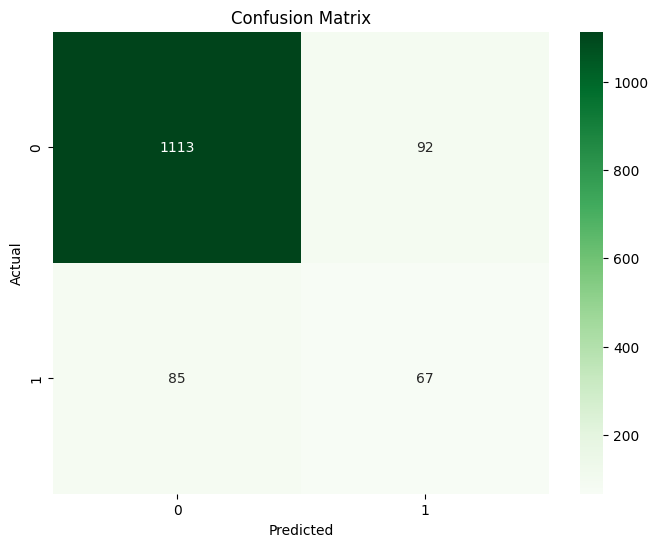

In [78]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [81]:
tree_structure = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Structure:")
print(tree_structure)



Decision Tree Structure:
|--- duration <= 561.00
|   |--- poutcome_success <= 0.50
|   |   |--- month_oct <= 0.50
|   |   |   |--- duration <= 222.50
|   |   |   |   |--- month_mar <= 0.50
|   |   |   |   |   |--- age <= 20.00
|   |   |   |   |   |   |--- month_feb <= 0.50
|   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |--- month_feb >  0.50
|   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |--- age >  20.00
|   |   |   |   |   |   |--- age <= 70.50
|   |   |   |   |   |   |   |--- pdays <= 375.50
|   |   |   |   |   |   |   |   |--- job_student <= 0.50
|   |   |   |   |   |   |   |   |   |--- month_sep <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- month_feb <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |   |   |   |   |   |   |   |--- month_feb >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- month_sep >  0.50
|   |  